# CIFAR_10

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [16]:
x_test.size

30720000

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
type(x_train)

numpy.ndarray

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

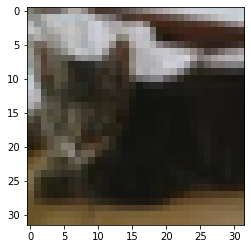

In [7]:
from matplotlib import pyplot as plt
plt.imshow(x_train[9])

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
type(train_images)

numpy.ndarray

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")])
model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=11, verbose=1, validation_data=(x_test,y_test))

2022-08-28 22:49:49.771866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/11
 477/1563 [========>.....................] - ETA: 1:49 - loss: 1.8494 - accuracy: 0.4006

KeyboardInterrupt: 

In [22]:
_, accuracy = model.evaluate(x_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

313/313 [==============================] - 10s 33ms/step - loss: 1.4837 - accuracy: 0.7130
Accuracy: 71.30


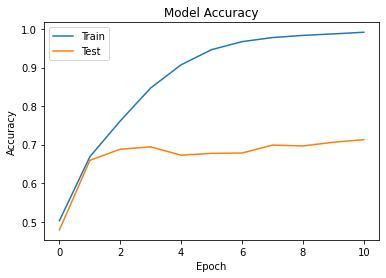

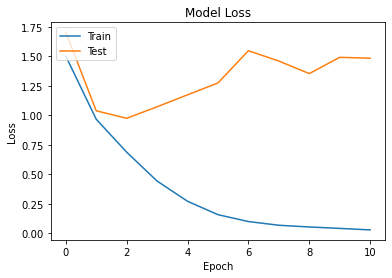

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"], loc="upper left")
plt.show()